In [11]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import zipfile

In [12]:
train_horse_dir = os.getcwd()+'/data/horse-or-human/train/horses'
train_human_dir = os.getcwd()+'/data/horse-or-human/train/humans'

In [13]:
horse_names = os.listdir(train_horse_dir)
human_names = os.listdir(train_human_dir)
horse_names[:10], human_names[:10]

(['horse24-6.png',
  'horse30-0.png',
  'horse42-2.png',
  'horse34-2.png',
  'horse22-6.png',
  'horse09-3.png',
  'horse25-9.png',
  'horse03-2.png',
  'horse19-8.png',
  'horse16-3.png'],
 ['human10-22.png',
  'human13-01.png',
  'human04-09.png',
  'human13-13.png',
  'human01-17.png',
  'human02-03.png',
  'human15-04.png',
  'human04-20.png',
  'human01-04.png',
  'human08-14.png'])

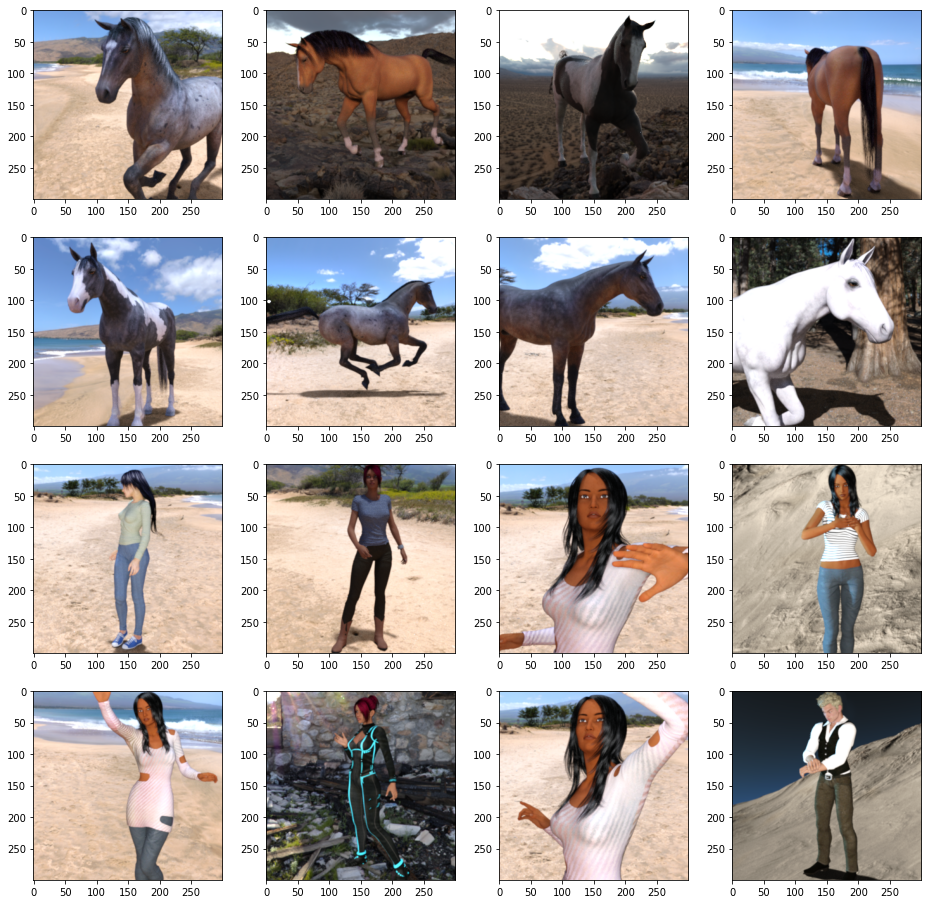

In [14]:
%matplotlib inline
import matplotlib.image as mpimg
fig  = plt.figure(figsize=(16,16))
index = 16
next_horse = [os.path.join(train_horse_dir,fname) for fname in horse_names[index-8:index]]
next_human = [os.path.join(train_human_dir,fname) for fname in human_names[index-8:index]]
for i, img_path in enumerate(next_horse + next_human):
    img = mpimg.imread(img_path)
    fig.add_subplot(4,4, i+1) 
    plt.imshow(img)

plt.show()

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(300,300,3), data_format='channels_last', name='Cov1'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), name='P1'),

    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', name='Cov2'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), name = 'P2'),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', name='Cov3'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), name = 'P3'),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', name='Cov4'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), name = 'P4'),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', name='Cov5'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), name = 'P5'),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu', name='FC1'),

    tf.keras.layers.Dense(1, activation='sigmoid', name = 'FC2'),
])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Cov1 (Conv2D)                (None, 298, 298, 16)      448       
_________________________________________________________________
P1 (MaxPooling2D)            (None, 149, 149, 16)      0         
_________________________________________________________________
Cov2 (Conv2D)                (None, 147, 147, 32)      4640      
_________________________________________________________________
P2 (MaxPooling2D)            (None, 73, 73, 32)        0         
_________________________________________________________________
Cov3 (Conv2D)                (None, 71, 71, 64)        18496     
_________________________________________________________________
P3 (MaxPooling2D)            (None, 35, 35, 64)        0         
_________________________________________________________________
Cov4 (Conv2D)                (None, 33, 33, 64)       

In [31]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [32]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255, data_format='channels_last')

train_generator = train_datagen.flow_from_directory(os.getcwd()+'/data/horse-or-human/train',
target_size=(300,300), batch_size=128, class_mode='binary')

Found 1027 images belonging to 2 classes.


In [33]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255, data_format='channels_last')
test_generator = test_datagen.flow_from_directory(os.getcwd()+'/data/horse-or-human/validation',
target_size=(300,300,3), batch_size=32, class_mode='binary')

Found 256 images belonging to 2 classes.


In [34]:
earlyStop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=2,restore_best_weights=True)

In [35]:
history = model.fit_generator(train_generator, steps_per_epoch=8, epochs=15, callbacks=[earlyStop], validation_data=test_generator, validation_steps=8, verbose=2)

Epoch 1/15
8/8 - 4s - loss: 0.9310 - accuracy: 0.5172 - val_loss: 0.6631 - val_accuracy: 0.5977
Epoch 2/15
8/8 - 5s - loss: 0.7072 - accuracy: 0.6730 - val_loss: 0.7355 - val_accuracy: 0.5000
Epoch 3/15
8/8 - 4s - loss: 0.9935 - accuracy: 0.7086 - val_loss: 0.3177 - val_accuracy: 0.8477
Epoch 4/15
8/8 - 5s - loss: 0.4252 - accuracy: 0.8053 - val_loss: 0.4569 - val_accuracy: 0.8789
Epoch 5/15
8/8 - 5s - loss: 0.1969 - accuracy: 0.9210 - val_loss: 1.2603 - val_accuracy: 0.8047


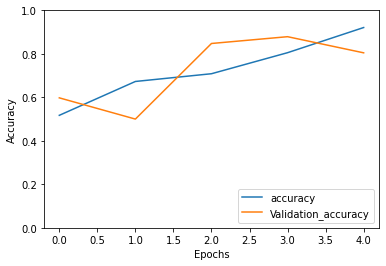

In [36]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='Validation_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim((0,1))
plt.legend(loc='lower right')

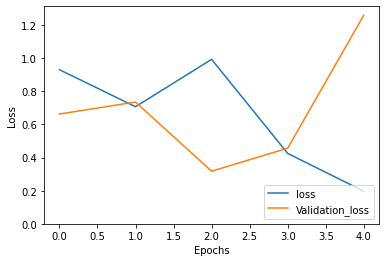

In [37]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='Validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(bottom=0)
plt.legend(loc='lower right')

[0.01401368]
[0.]
[1.084181e-05]
[7.191466e-33]
[0.]
[1.]
[0.]
[0.]
[0.]
[0.]
[1.]


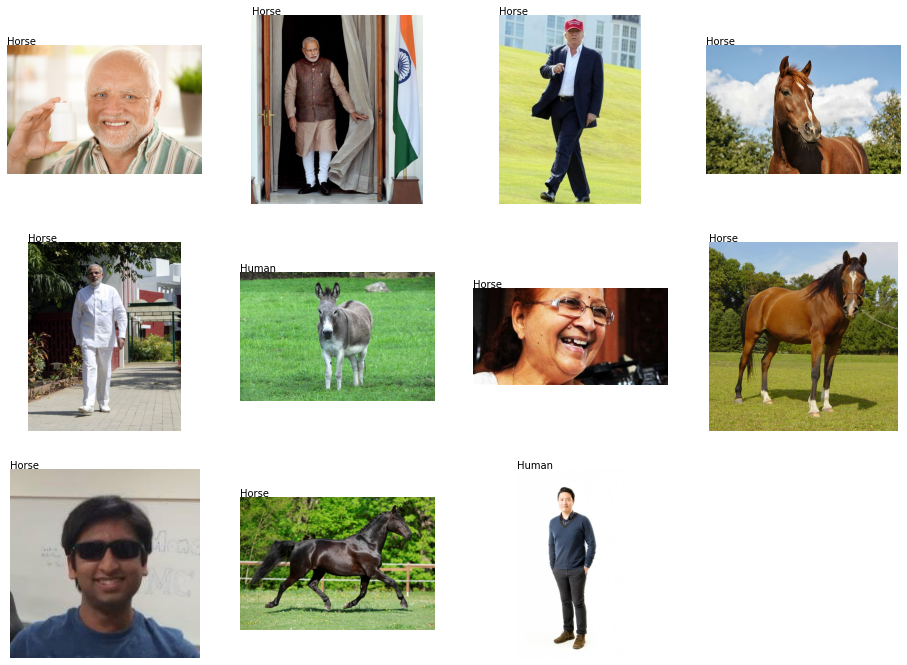

In [38]:
import numpy as np
uploads = os.listdir(os.getcwd()+'/data/horse-or-human/upload')
size = len(uploads)
fig = plt.figure(figsize=(16,16))
for i, file in enumerate(os.listdir(os.getcwd()+'/data/horse-or-human/upload')):
 
  # predicting images
  path = os.getcwd() + '/data/horse-or-human/upload/' + file
  img = tf.keras.preprocessing.image.load_img(path, target_size=(300, 300))
  x = tf.keras.preprocessing.image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  saved = mpimg.imread(path)
  fig.add_subplot(4,4,i+1)
  plt.imshow(saved)
  
  plt.axis('off')
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    plt.text(x=0, y=0,s='Human')
  else:
    plt.text(x=0 ,y=0, s='Horse')